# Boosting and Bagging both have been added

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier ##These is the bagging type in ensembling techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('Travel.csv')
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Feature Engineering

### Data Cleaning

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [42]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [43]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [44]:
cat_columns = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
for col in cat_columns:
    print(data[col].value_counts())

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [45]:
data['Gender'] = data['Gender'].replace('Fe male', 'Female')
data['MaritalStatus'] = data['MaritalStatus'].replace('Single', 'Unmarried')

Selecting which columns have nan values

In [46]:
nan_cols = [feature for feature in data.columns if data[feature].isnull().sum() >= 1]
nan_cols

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

Selecting which nan values will be replaced with medain or mode values of there columns

In [47]:
median_cols = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
mode_cols = [feature for  feature in nan_cols if feature not in median_cols]
median_cols, mode_cols

(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome'],
 ['TypeofContact',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfChildrenVisiting'])

In [48]:
for col in median_cols:
    data[col].fillna(data[col].median(), inplace=True)
for col in mode_cols:
    data[col].fillna(data[col].mode().values[0], inplace=True)
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [49]:
data.drop(columns=['CustomerID'], axis=1, inplace=True)

In [50]:
x = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']
x, y

(       Age    TypeofContact  ...     Designation  MonthlyIncome
 0     41.0     Self Enquiry  ...         Manager        20993.0
 1     49.0  Company Invited  ...         Manager        20130.0
 2     37.0     Self Enquiry  ...       Executive        17090.0
 3     33.0  Company Invited  ...       Executive        17909.0
 4     36.0     Self Enquiry  ...       Executive        18468.0
 ...    ...              ...  ...             ...            ...
 4883  49.0     Self Enquiry  ...         Manager        26576.0
 4884  28.0  Company Invited  ...       Executive        21212.0
 4885  52.0     Self Enquiry  ...  Senior Manager        31820.0
 4886  19.0     Self Enquiry  ...       Executive        20289.0
 4887  36.0     Self Enquiry  ...       Executive        24041.0
 
 [4888 rows x 18 columns],
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 4883    1
 4884    1
 4885    1
 4886    1
 4887    1
 Name: ProdTaken, Length: 4888, dtype: int64)

In [51]:
cat_cols = [feature for feature in x.columns if data[feature].dtype == 'O']
data[cat_cols]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Unmarried,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Unmarried,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Unmarried,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Unmarried,Executive


In [52]:
num_cols = [feature for feature in x.columns if feature not in cat_cols]
data[num_cols]

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,36.0,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, y_train.shape

((3421, 18), (3421,))

# Model Training

In [54]:
encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

transformer = ColumnTransformer(
    [
        ("OneHotEncoder", encoder, cat_cols),
        ("StandardScaler", scaler, num_cols)
    ]
)
transformer

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['TypeofContact', 'Occupation', 'Gender',
                                  'ProductPitched', 'MaritalStatus',
                                  'Designation']),
                                ('StandardScaler', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfPersonVisiting', 'NumberOfFollowups',
                                  'PreferredPropertyStar', 'NumberOfTrips',
                                  'Passport', 'PitchSatisfactionScore',
                                  'OwnCar', 'NumberOfChildrenVisiting',
                                  'MonthlyIncome'])])

In [55]:
x_train = transformer.fit_transform(x_train)
x_train

array([[ 1.        ,  0.        ,  1.        , ...,  0.78143477,
        -0.21998888,  0.4603181 ],
       [ 1.        ,  1.        ,  0.        , ..., -1.27969734,
        -0.21998888, -1.00566841],
       [ 1.        ,  0.        ,  1.        , ...,  0.78143477,
        -0.21998888, -1.2097217 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78143477,
         0.95225716, -0.35739958],
       [ 1.        ,  0.        ,  0.        , ...,  0.78143477,
         0.95225716, -0.25076528],
       [ 0.        ,  0.        ,  1.        , ..., -1.27969734,
        -1.39223493, -1.07168012]])

In [56]:
x_test = transformer.transform(x_test)
x_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.27969734,
        -0.21998888, -0.73033753],
       [ 1.        ,  0.        ,  0.        , ..., -1.27969734,
        -0.21998888, -0.66394968],
       [ 1.        ,  0.        ,  0.        , ...,  0.78143477,
        -1.39223493, -0.417017  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78143477,
        -0.21998888, -0.08075222],
       [ 1.        ,  0.        ,  1.        , ...,  0.78143477,
        -0.21998888,  1.97576639],
       [ 1.        ,  0.        ,  1.        , ..., -1.27969734,
        -1.39223493,  1.28837951]])

In [57]:
models = {
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(), 
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "XGBClassifier" : XGBClassifier()
}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    print(list(models.keys())[i])
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    print(score, '\n', cm, '\n', classification_report(y_test, pred))
    print(roc_auc_score(y_test, pred))
    print()
    print() 

Decision Tree
0.8991138377641446 
 [[1117   76]
 [  72  202]] 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1193
           1       0.73      0.74      0.73       274

    accuracy                           0.90      1467
   macro avg       0.83      0.84      0.83      1467
weighted avg       0.90      0.90      0.90      1467

0.8367606659283777


Random Forest
0.9188820722563054 
 [[1184    9]
 [ 110  164]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1193
           1       0.95      0.60      0.73       274

    accuracy                           0.92      1467
   macro avg       0.93      0.80      0.84      1467
weighted avg       0.92      0.92      0.91      1467

0.7954980696398088


AdaBoostClassifier
0.8350374914792092 
 [[1140   53]
 [ 189   85]] 
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      119

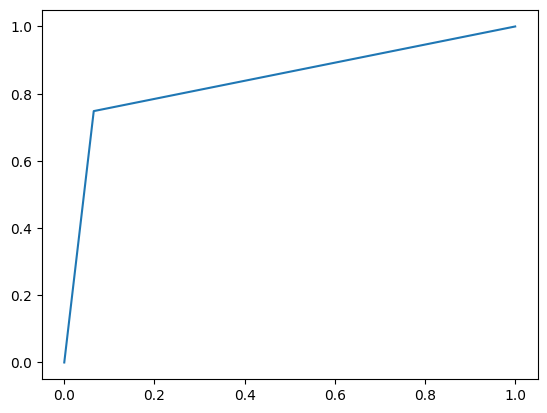

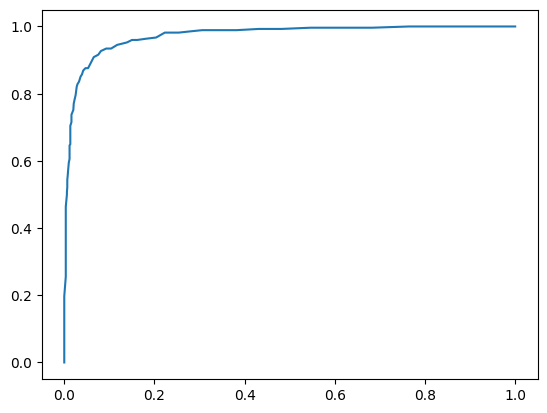

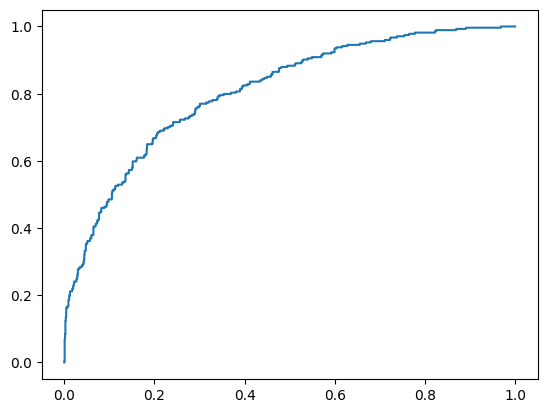

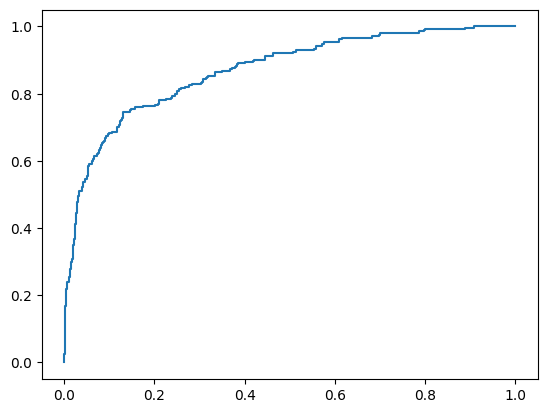

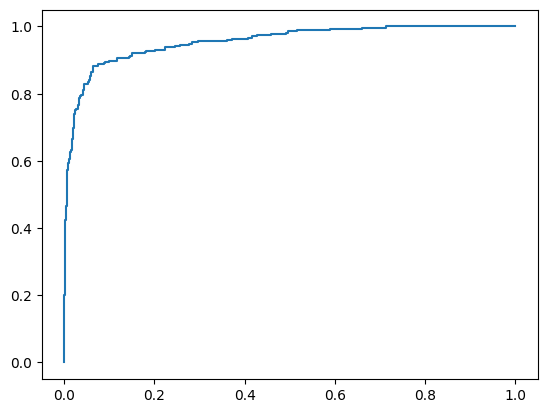

In [58]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr)
    plt.show()

# Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [60]:
data = pd.read_csv('cardekho_dataset.csv', index_col=0)
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [61]:
data = data.reindex(index = [x for x in range(len(data))])
data

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,120000.0
1,Hyundai Grand,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,550000.0
2,Hyundai i20,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,215000.0
3,Maruti Alto,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,226000.0
4,Ford Ecosport,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,570000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Audi A4,Audi,A4,7.0,98300.0,Dealer,Diesel,Automatic,17.11,1968.0,174.33,5.0,1350000.0
15407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15408,Maruti Ertiga,Maruti,Ertiga,3.0,11128.0,Dealer,CNG,Manual,17.50,1373.0,80.46,7.0,875000.0
15409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           12150 non-null  object 
 1   brand              12150 non-null  object 
 2   model              12150 non-null  object 
 3   vehicle_age        12150 non-null  float64
 4   km_driven          12150 non-null  float64
 5   seller_type        12150 non-null  object 
 6   fuel_type          12150 non-null  object 
 7   transmission_type  12150 non-null  object 
 8   mileage            12150 non-null  float64
 9   engine             12150 non-null  float64
 10  max_power          12150 non-null  float64
 11  seats              12150 non-null  float64
 12  selling_price      12150 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.6+ MB


In [63]:
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,12150.000000,1.215000e+04,12150.000000,12150.000000,12150.000000,12150.000000,1.215000e+04
mean,6.026255,5.544660e+04,19.740071,1484.032016,100.189301,5.331770,7.650491e+05
std,3.011387,4.320890e+04,4.175324,523.047129,43.166001,0.814998,9.154138e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.800000e+05
50%,6.000000,5.000000e+04,19.700000,1248.000000,88.500000,5.000000,5.500000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.000000e+05
max,29.000000,1.325000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [64]:
data.isnull().sum()

car_name             3261
brand                3261
model                3261
vehicle_age          3261
km_driven            3261
seller_type          3261
fuel_type            3261
transmission_type    3261
mileage              3261
engine               3261
max_power            3261
seats                3261
selling_price        3261
dtype: int64

In [65]:
for col in data.columns:
    print(data[col].value_counts())

car_name
Maruti Swift Dzire       725
Hyundai i20              715
Maruti Alto              621
Maruti Swift             611
Maruti Wagon R           599
                        ... 
Jeep Wrangler              1
ISUZU MUX                  1
Hyundai Aura               1
Maserati Ghibli            1
Maserati Quattroporte      1
Name: count, Length: 119, dtype: int64
brand
Maruti           3963
Hyundai          2348
Honda            1169
Mahindra          832
Ford              634
Toyota            619
Volkswagen        461
Renault           420
Tata              348
BMW               326
Mercedes-Benz     260
Skoda             243
Datsun            145
Audi              141
Jaguar             46
Land Rover         41
Jeep               31
Kia                25
Volvo              20
Porsche            19
MG                 17
Mini               13
Lexus               8
Nissan              7
Isuzu               6
Maserati            2
Bentley             2
ISUZU               1
Ferrari    

In [66]:
data.drop(columns=['car_name', 'brand', 'model'], axis = 1, inplace=True)
data

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9.0,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,120000.0
1,5.0,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,550000.0
2,11.0,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,215000.0
3,9.0,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,226000.0
4,6.0,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,570000.0
...,...,...,...,...,...,...,...,...,...,...
15406,7.0,98300.0,Dealer,Diesel,Automatic,17.11,1968.0,174.33,5.0,1350000.0
15407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15408,3.0,11128.0,Dealer,CNG,Manual,17.50,1373.0,80.46,7.0,875000.0
15409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
median_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
mode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']

for col in median_cols:
    data[col].fillna(data[col].median(), inplace=True)
for col in mode_cols:
    data[col].fillna(data[col].mode().values[0], inplace = True)
data.isnull().sum()

vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [68]:
x = data.drop('selling_price', axis=1)
y = data['selling_price']
x, y

(       vehicle_age  km_driven seller_type  ...  engine max_power  seats
 0              9.0   120000.0  Individual  ...   796.0     46.30    5.0
 1              5.0    20000.0  Individual  ...  1197.0     82.00    5.0
 2             11.0    60000.0  Individual  ...  1197.0     80.00    5.0
 3              9.0    37000.0  Individual  ...   998.0     67.10    5.0
 4              6.0    30000.0      Dealer  ...  1498.0     98.59    5.0
 ...            ...        ...         ...  ...     ...       ...    ...
 15406          7.0    98300.0      Dealer  ...  1968.0    174.33    5.0
 15407          6.0    50000.0      Dealer  ...  1248.0     88.50    5.0
 15408          3.0    11128.0      Dealer  ...  1373.0     80.46    7.0
 15409          6.0    50000.0      Dealer  ...  1248.0     88.50    5.0
 15410          4.0    46871.0      Dealer  ...   796.0     47.30    5.0
 
 [15411 rows x 9 columns],
 0         120000.0
 1         550000.0
 2         215000.0
 3         226000.0
 4         5700

In [69]:
cat_cols = [feature for feature in x.columns if x[feature].dtype == 'O']
num_cols = [feature for feature in x.columns if feature not in cat_cols]
cat_cols, num_cols

(['seller_type', 'fuel_type', 'transmission_type'],
 ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, y_train.shape

((10787, 9), (10787,))

In [71]:
transformer = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(drop='first'), cat_cols),
        ("StandardScaler", StandardScaler(), num_cols)
    ]
)

x_train = transformer.fit_transform(x_train)
x_train

array([[ 1.        ,  0.        ,  1.        , ...,  2.27887662,
         0.93990193, -0.34783549],
       [ 0.        ,  0.        ,  0.        , ..., -0.38952901,
        -0.23960557, -0.34783549],
       [ 0.        ,  1.        ,  0.        , ..., -0.92278353,
         0.5342032 , -0.34783549],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.38952901,
        -0.23960557, -0.34783549],
       [ 1.        ,  0.        ,  1.        , ..., -0.38952901,
        -0.61549257, -0.34783549],
       [ 0.        ,  0.        ,  0.        , ..., -0.38952901,
        -0.23960557, -0.34783549]])

In [72]:
x_test = transformer.transform(x_test)

In [75]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RF Regressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor()
}

for i in range(len(models)):
    reg = list(models.values())[i]
    reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    print(list(models.keys())[i])
    print("MSE :", mean_squared_error(y_test, pred))
    print("r2_score :", r2_score(y_test, pred))
    print()
    print()

Linear Regression
MSE : 191050831888.01028
r2_score : 0.6521209608688492


Lasso
MSE : 191050362837.13284
r2_score : 0.6521218149502835


Ridge
MSE : 191028042258.48877
r2_score : 0.6521624578586385


KNeighborsRegressor
MSE : 58180626894.46367
r2_score : 0.8940605472371973


DecisionTreeRegressor
MSE : 86334387121.23943
r2_score : 0.8427961640422545


RF Regressor
MSE : 42147581192.51825
r2_score : 0.9232546652529098


AdaBoostRegressor
MSE : 147782017646.5356
r2_score : 0.7309079170622239


GradientBoostingRegressor
MSE : 88038281803.49527
r2_score : 0.8396935905596574


XGBRegressor
MSE : 163842020896.39868
r2_score : 0.7016647128123703


